In [1]:
consumerKey = '5OBZDcObonT3Pdf9du705G5KP'
consumerSecret = '24qgOlLKmywVLeID6FV0IHNscyPt1mTcWeXA5M8tDDV6bngvJt'
accessToken = '1266772148875489282-AhXazdXEk0gMfT5V9tRtGSy6pLGIP5'
accessTokenSecret = 'IziL7kVEUNF8KwgQVVAMWxhPLA4xNaZN1lbKDkVG3PE7W'

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

NameError: name 'tweepy' is not defined

In [ ]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="elonmusk", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Unexpected parameter: lang


Show the 5 recent tweets:

1) @CathieDWood 💯

2) @WholeMarsBlog It will

3) @chicago_glenn @neiltyson Strange @Twitter

4) @WholeMarsBlog I have no desire to become involved in wars, but it is safe to say that all bets are off if the nukes start flying

5) @Teslarati Strong candidate to win most counter-intuitive product of the year!



In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,@CathieDWood 💯
1,@WholeMarsBlog It will
2,@chicago_glenn @neiltyson Strange @Twitter
3,@WholeMarsBlog I have no desire to become invo...
4,@Teslarati Strong candidate to win most counte...


In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,💯
1,It will
2,_glenn Strange
3,"I have no desire to become involved in wars, ..."
4,Strong candidate to win most counter-intuitiv...
...,...
95,"Buying Twitter is an accelerant to creating X,..."
96,2k _whales 🤣
97,Should be noted that Starlink is still far fr...
98,63 A small number of terminals were paid for ...


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,💯,0.000000,0.000000
1,It will,0.000000,0.000000
2,_glenn Strange,0.150000,-0.050000
3,"I have no desire to become involved in wars, ...",0.500000,0.500000
4,Strong candidate to win most counter-intuitiv...,0.544444,0.619444
...,...,...,...
95,"Buying Twitter is an accelerant to creating X,...",0.000000,0.000000
96,2k _whales 🤣,0.000000,0.000000
97,Should be noted that Starlink is still far fr...,0.737374,0.220202
98,63 A small number of terminals were paid for ...,0.700000,-0.125000


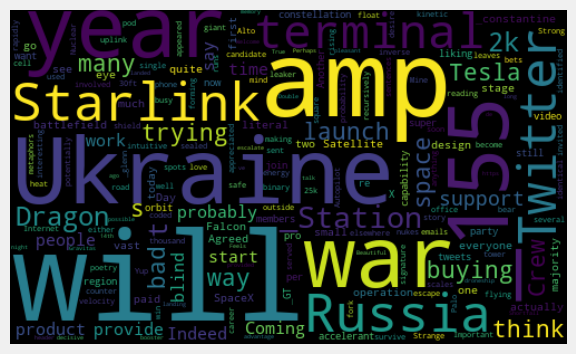

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,💯,0.000000,0.000000,Neutral
1,It will,0.000000,0.000000,Neutral
2,_glenn Strange,0.150000,-0.050000,Negative
3,"I have no desire to become involved in wars, ...",0.500000,0.500000,Positive
4,Strong candidate to win most counter-intuitiv...,0.544444,0.619444,Positive
...,...,...,...,...
95,"Buying Twitter is an accelerant to creating X,...",0.000000,0.000000,Neutral
96,2k _whales 🤣,0.000000,0.000000,Neutral
97,Should be noted that Starlink is still far fr...,0.737374,0.220202,Positive
98,63 A small number of terminals were paid for ...,0.700000,-0.125000,Negative


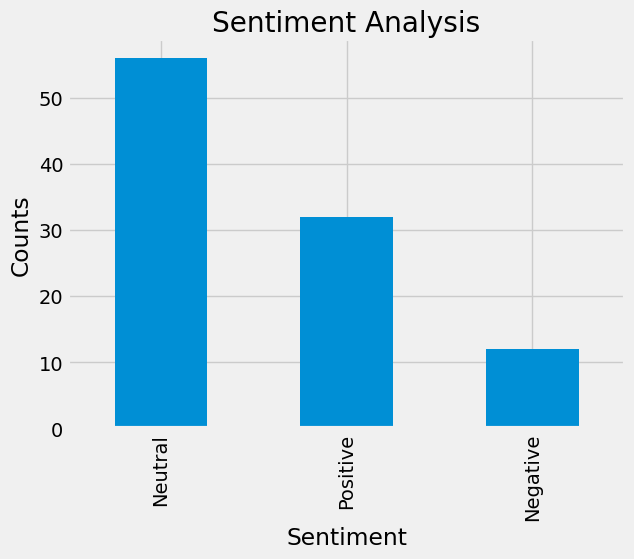

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()